<a href="https://colab.research.google.com/github/armanalam6342/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


In [40]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

##<b> Import Modules

In [41]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})

## <b> Loading the dataset

In [42]:
data= pd.read_csv("/content/drive/MyDrive/Bike Sharing Demand Prediction/SeoulBikeData.csv", encoding = "ISO-8859-1")

In [43]:
# Copy the data for backup
df = data.copy()

In [44]:
# Getting feel of the data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [45]:
# Data shape
df.shape

(8760, 14)

In [46]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [47]:
# Statistical info 
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,17/05/2018,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760,NaN,NaN,NaN,704.602,644.997,0,191,504.5,1065.25,3556
Hour,8760,NaN,NaN,NaN,11.5,6.92258,0,5.75,11.5,17.25,23
Temperature(°C),8760,NaN,NaN,NaN,12.8829,11.9448,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760,NaN,NaN,NaN,58.2263,20.3624,0,42,57,74,98
Wind speed (m/s),8760,NaN,NaN,NaN,1.72491,1.0363,0,0.9,1.5,2.3,7.4
Visibility (10m),8760,NaN,NaN,NaN,1436.83,608.299,27,940,1698,2000,2000
Dew point temperature(°C),8760,NaN,NaN,NaN,4.07381,13.0604,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760,NaN,NaN,NaN,0.569111,0.868746,0,0,0.01,0.93,3.52
Rainfall(mm),8760,NaN,NaN,NaN,0.148687,1.12819,0,0,0,0,35


##<b> Preprocessing the data

In [48]:
# Checking null values of data 
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [49]:
# Checking duplicate
df.duplicated().sum()

0

In [50]:
# converting date column dtype object to date 
df['Date']=pd.to_datetime(df['Date'])

In [51]:
# split day of week, month and year in three column
df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
df["month"] = df['Date'].dt.month_name()   # extract month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

In [52]:
# drop the Date column
df.drop(columns=['Date'],inplace=True)

##<b> Exploratory data analysis 

##<b> When we observe the data we realize that Hour column is a numerical column but it is a time stamp so we have to treat Hour as a categorical feature

In [53]:
# convert Hour column integer to Categorical 
df['Hour']=df['Hour'].astype('object')

In [14]:
# Divide Data in categorical and numerical
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [15]:
categorical_features

,Seasons,Holiday,Functioning Day,day_of_week,month,year
0,Winter,No Holiday,Yes,Thursday,January,2017
1,Winter,No Holiday,Yes,Thursday,January,2017
2,Winter,No Holiday,Yes,Thursday,January,2017
3,Winter,No Holiday,Yes,Thursday,January,2017
4,Winter,No Holiday,Yes,Thursday,January,2017
...,...,...,...,...,...,...
8755,Autumn,No Holiday,Yes,Friday,November,2018
8756,Autumn,No Holiday,Yes,Friday,November,2018
8757,Autumn,No Holiday,Yes,Friday,November,2018
8758,Autumn,No Holiday,Yes,Friday,November,2018


In [16]:
# checking categorical column value count
for i in categorical_features.columns:
  print("\n ")
  print('column name  : ', i)
  print(df[i].value_counts())


 
column name  :  Seasons
Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

 
column name  :  Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

 
column name  :  Functioning Day
Yes    8465
No      295
Name: Functioning Day, dtype: int64

 
column name  :  day_of_week
Sunday       1296
Tuesday      1272
Wednesday    1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: day_of_week, dtype: int64

 
column name  :  month
July         744
May          744
January      744
March        744
August       744
October      744
December     744
September    720
June         720
November     720
April        720
February     672
Name: month, dtype: int64

 
column name  :  year
2018    8016
2017     744
Name: year, dtype: int64


In [17]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_of_week,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


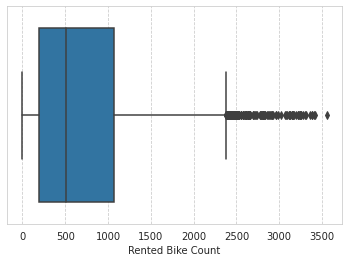

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


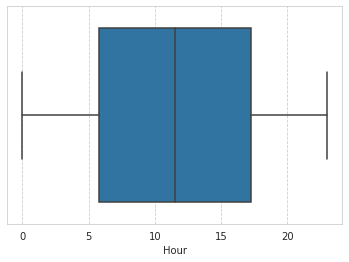

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


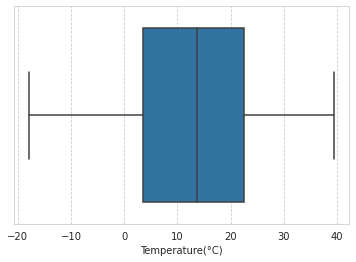

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


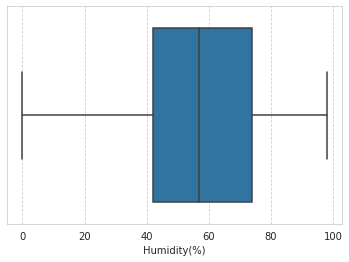

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


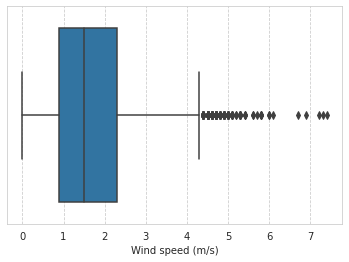

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


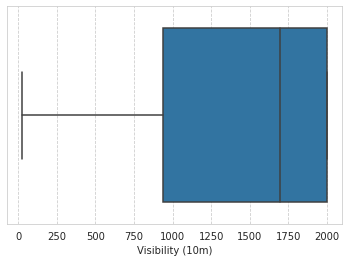

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


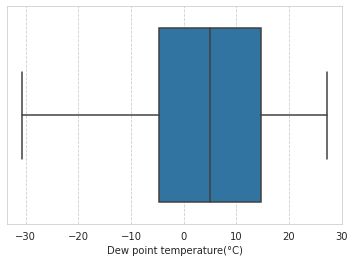

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


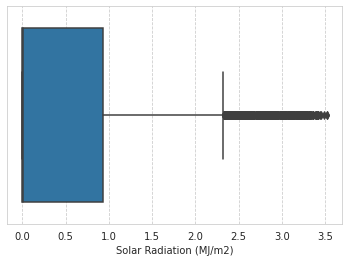

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


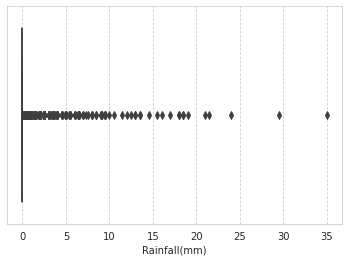

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


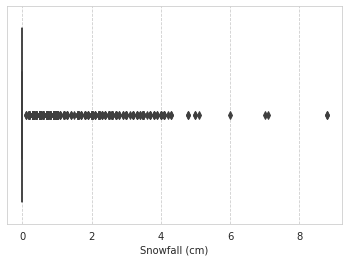

In [18]:
# checking Outliers with seaborn boxplot
for i in numeric_features.columns:
  sns.boxplot(df[i])
  plt.show()

We don't think of worry about outliers in this data 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


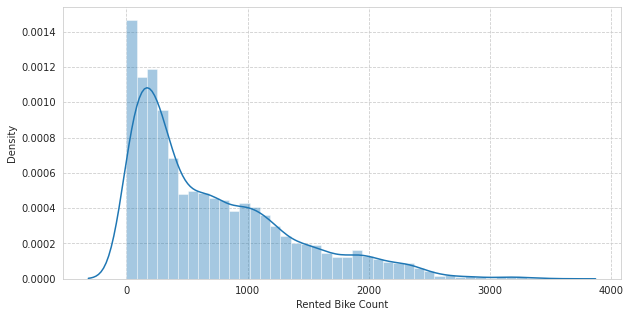

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


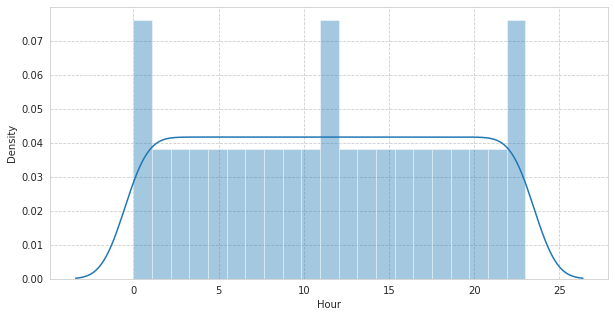

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


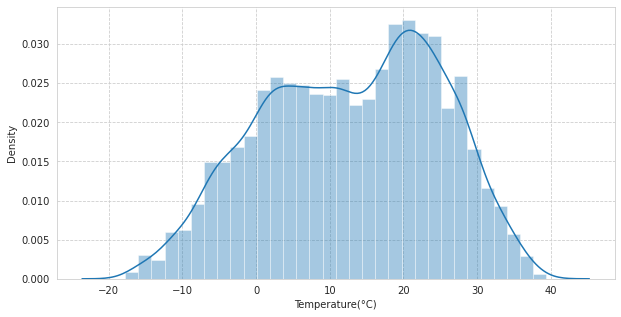

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


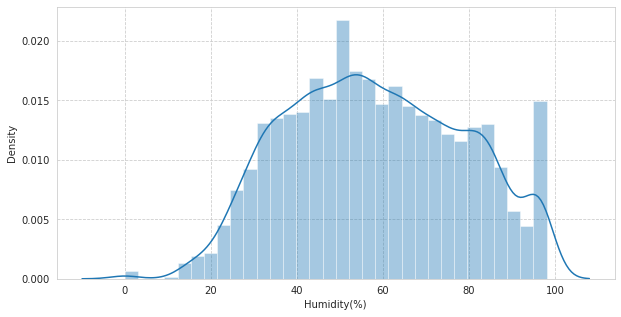

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


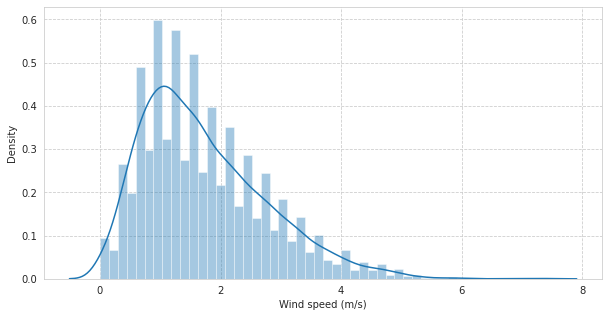

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


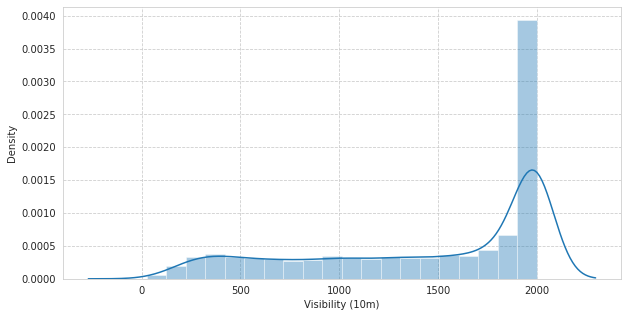

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


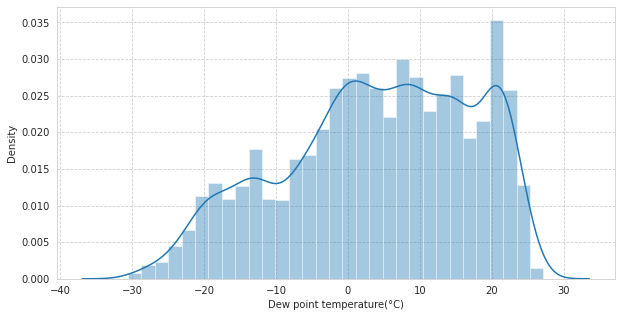

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


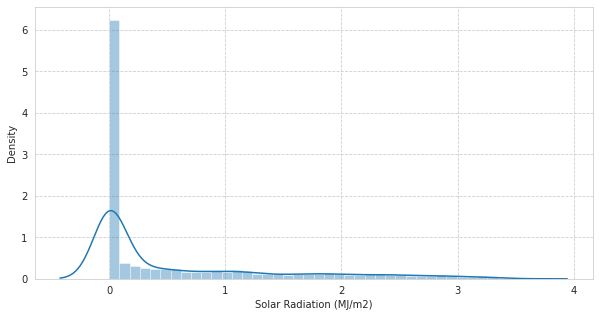

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


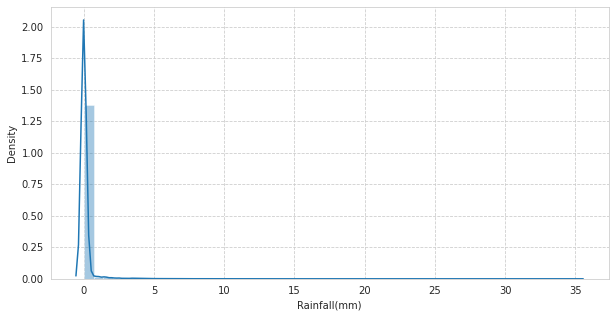

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


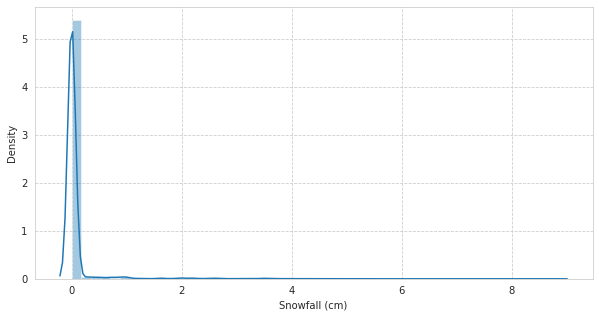

In [19]:
# Distrubution of Data
for i in numeric_features.columns:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i])

  plt.show()

# In this plots we observe that some of our columns is right skewed and some are left skewed we have to remember this things when we apply algorithms

## Right skewed columns are
Rented Bike Count (Its also our Dependent variable), 
Wind speed (m/s),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm),

## Left skewed columns are
Visibility (10m), 
Dew point temperature(°C)


In [38]:
numeric_features.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

<Figure size 1080x720 with 0 Axes>

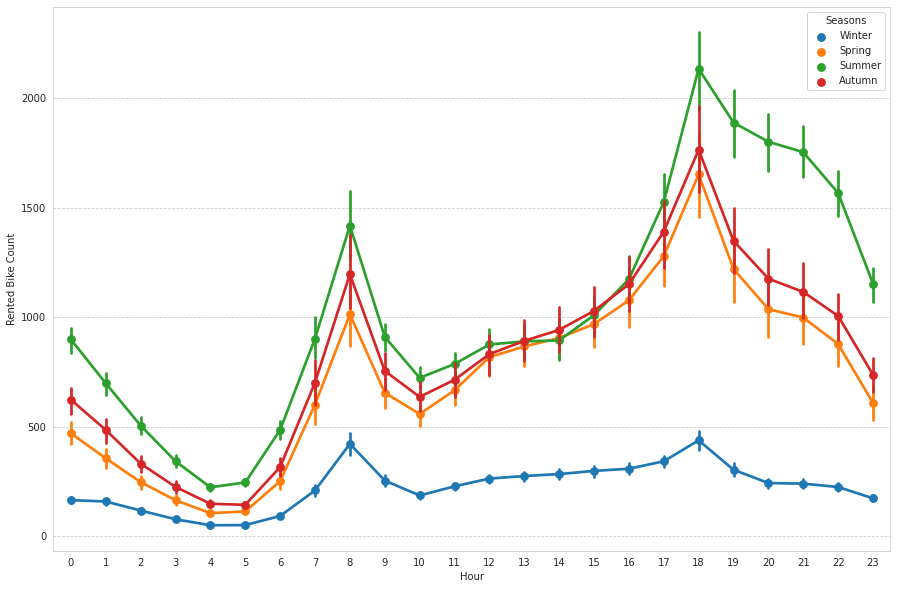

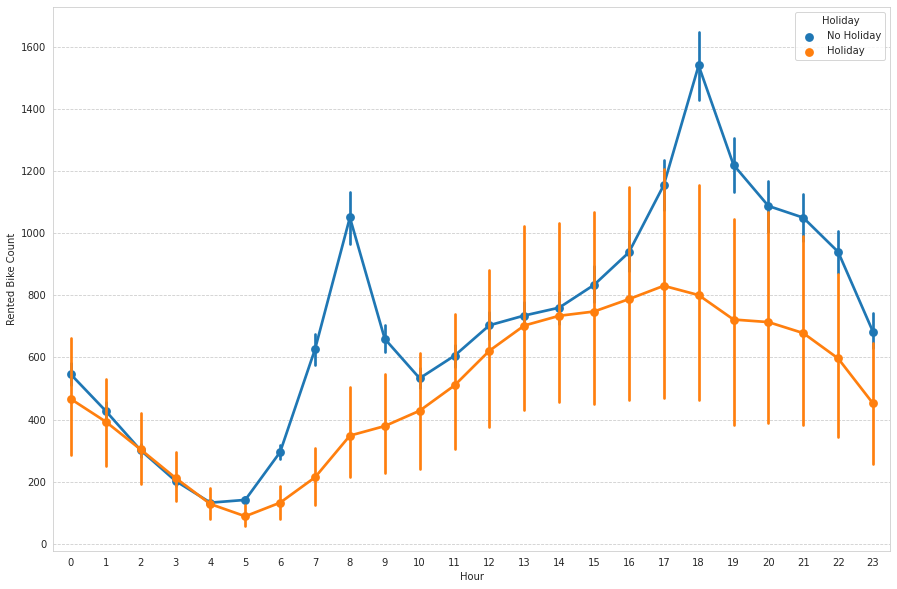

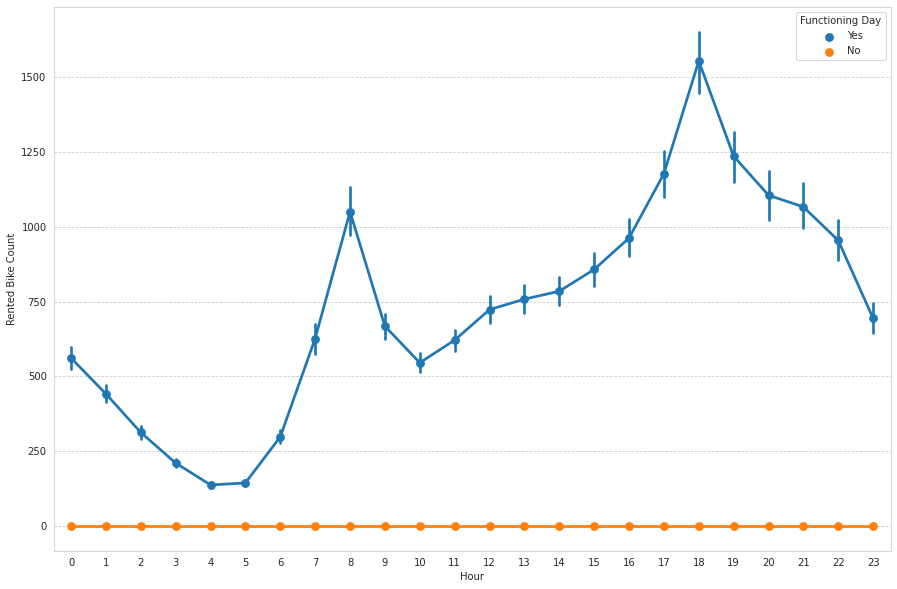

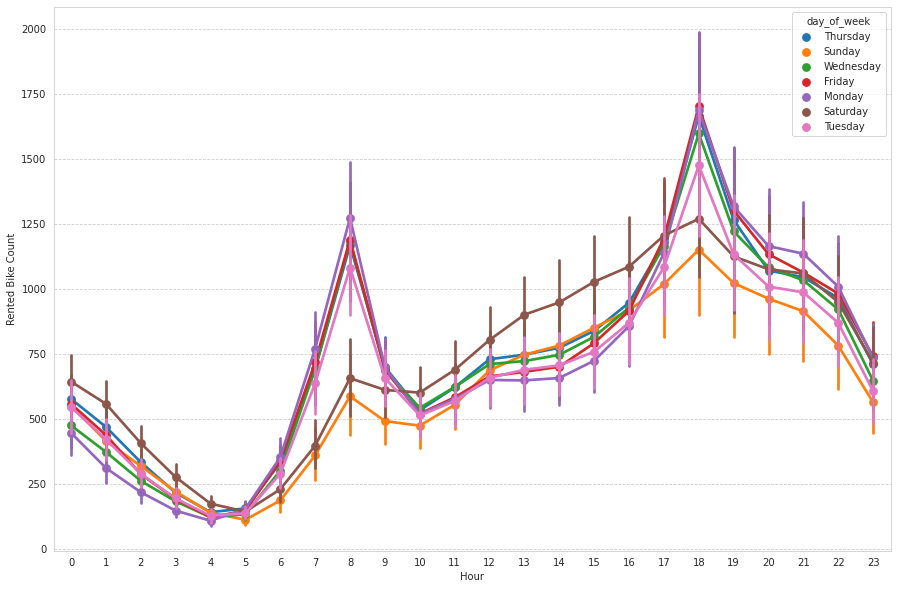

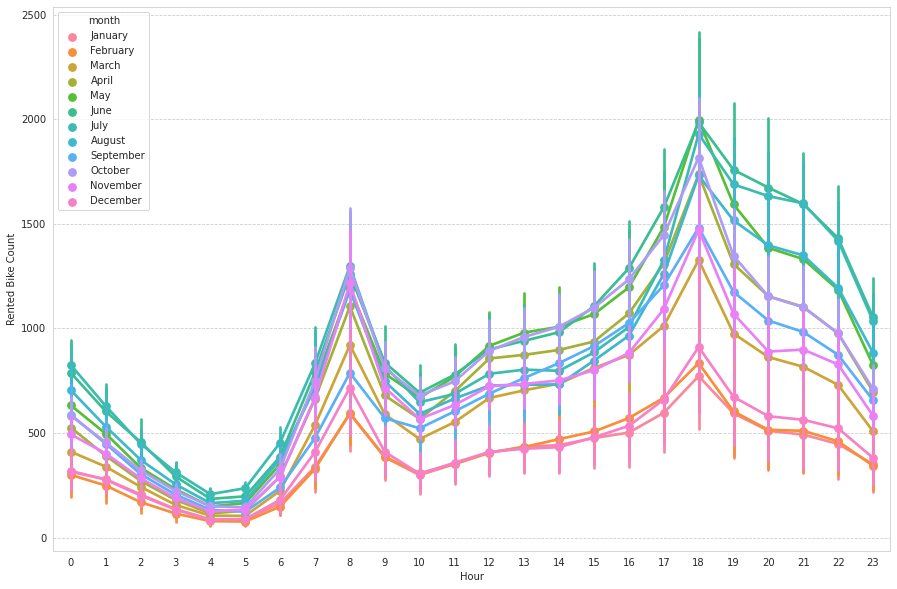

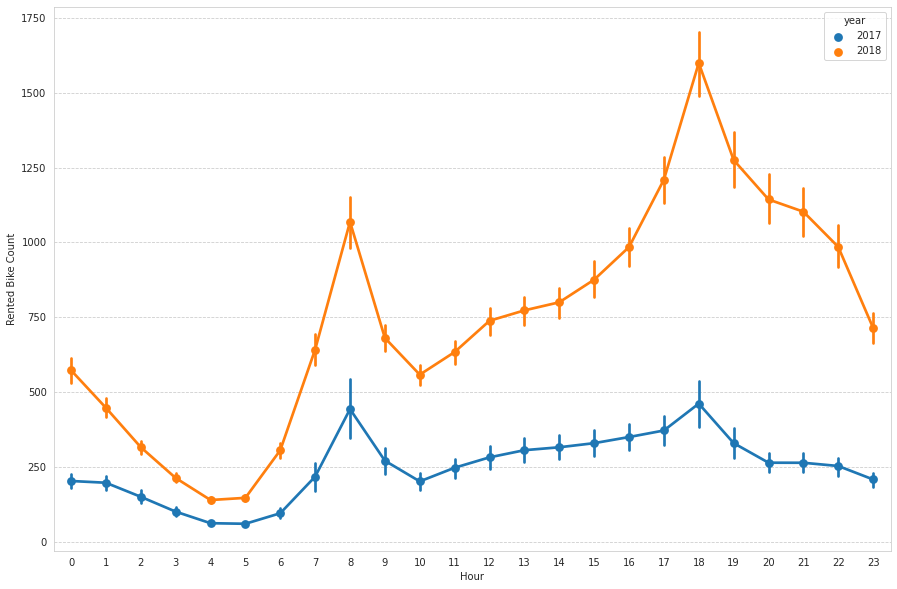

In [20]:

plt.figure(figsize=(15,10))
for i in categorical_features.columns:
  plt.figure(figsize=(15,10))
  sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df[i])

  plt.show()

In [21]:
# Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend
df['week'] = df['day_of_week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [22]:
# Checking value counts of Week column
df.week.value_counts()

Weekdays    6216
Weekend     2544
Name: week, dtype: int64

Text(0.5, 1.0, '')

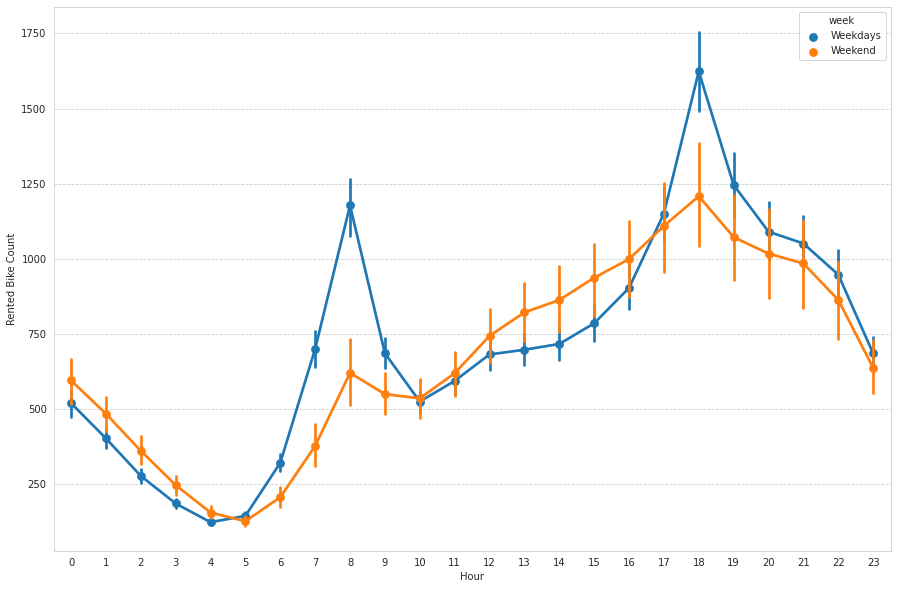

In [23]:
# Getting feel of week column with pointplot  
plt.figure(figsize=(15,10))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df['week'])
plt.title("")

In [24]:
# Correlation with Rented Bike Count
df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Hour                         0.410257
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Name: Rented Bike Count, dtype: float64

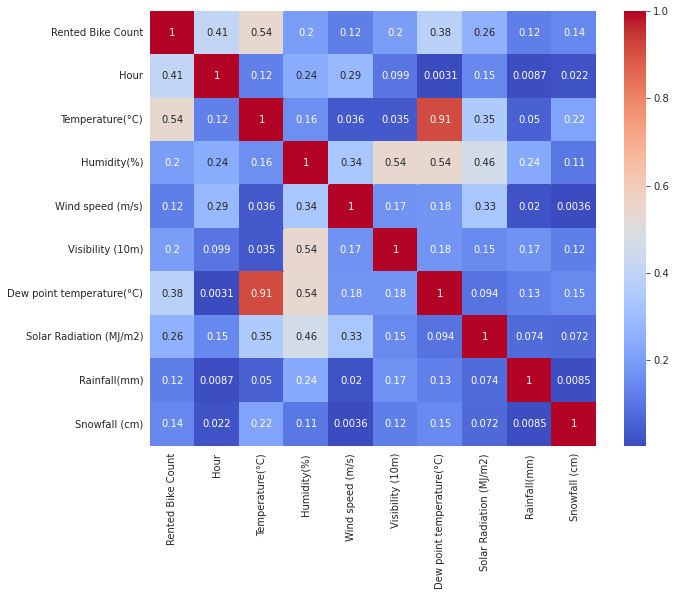

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)

In [26]:
df.drop(columns=['day_of_week'],inplace=True)

In [27]:
df.drop(columns=['Temperature(°C)'],inplace=True)

In [28]:
df['Hour']=df['Hour'].astype("object")

In [29]:
new_df=pd.get_dummies(df,drop_first=True,sparse=True)

In [30]:
df.head()

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,week
0,254,0,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,Weekdays
1,204,1,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,Weekdays
2,173,2,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,Weekdays
3,107,3,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,Weekdays
4,78,4,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,Weekdays


In [31]:
new_df.head()

,Rented Bike Count,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2018,week_Weekend
0,254,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,204,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,173,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,107,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,78,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [32]:
df['Rented Bike Count']=df['Rented Bike Count'].astype('int')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


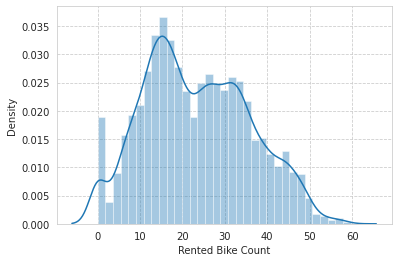

In [33]:
sns.distplot(np.sqrt(new_df['Rented Bike Count']))

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [36]:
X.head(2)

NameError: ignored

In [ ]:
X = df.drop(columns='Rented Bike Count')
y =np.sqrt(df['Rented Bike Count'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
bins_hour = KBinsDiscretizer(n_bins=5, encode='ordinal')
bins_month = KBinsDiscretizer(n_bins=12,)

In [ ]:
a = bins_month.fit_transform(X_train)

In [ ]:
one = OneHotEncoder(sparse=True, drop='first')

In [ ]:
X_train.info()

In [ ]:
trf = ColumnTransformer([
                         ('first', bins_hour,['Hour']),
                        #  ('secound',bins_month,['month']),
                        #  ('third'),one,['Seasons','Holiday','Functioning Day','year','week']
])

In [ ]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [ ]:
X_train_trf

In [ ]:
X = new_df.drop(columns='Rented Bike Count')
y =np.sqrt(new_df['Rented Bike Count'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.preprocessing import StandardScaler, RobustScaler
std = PowerTransformer()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
Y_pred = regressor.predict(X_test)
print('Reg Score',regressor.score(X_test,y_test))
print(regressor.score(X_train,y_train))
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
def score_metrix (actual,predicted):
  MSE  = mean_squared_error(actual,predicted)
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2 = r2_score(actual,predicted)
  print("R2 :" ,r2)
  print("Adjusted R2 : ",1-(1-r2_score(actual,predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
score_metrix(y_test**2,Y_pred**2)

In [ ]:
df.info()

In [ ]:

for col in df.describe().columns:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

In [ ]:
num_col = df.describe().columns

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(abs(df.corr()),cmap='coolwarm',annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
num_col

In [ ]:
calc_vif(df[[i for i in num_col if i not in ['Rented Bike Count','Temperature(°C)']]])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
df['year']= df['Date'].dt.strftime('%y')

In [ ]:
df.drop(columns='Date',inplace=True)

In [ ]:
df.drop(columns='Temperature(°C)',inplace=True)

In [ ]:
df.corr()['Rented Bike Count']

In [ ]:
sns.distplot(df['Rented Bike Count'])

In [ ]:
sns.displot(np.sqrt(df['Rented Bike Count']))

In [ ]:
df.head(1)

In [ ]:
new_df = pd.get_dummies(df, drop_first=True)

In [ ]:
new_df.head(1)

In [ ]:
X = new_df.drop(columns='Rented Bike Count')
y =np.sqrt(new_df['Rented Bike Count'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
Y_pred = regressor.predict(X_test)
print('Reg Score',regressor.score(X_test,y_test))
print(regressor.score(X_train,y_train))
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
def score_metrix (actual,predicted):
  MSE  = mean_squared_error(actual,predicted)
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2 = r2_score(actual,predicted)
  print("R2 :" ,r2)
  print("Adjusted R2 : ",1-(1-r2_score(actual,predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
  score_metrix(y_test**2,Y_pred**2)

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
Y_pred = regressor.predict(X_test)
print('Reg Score',regressor.score(X_test,y_test))
print(regressor.score(X_train,y_train))

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
def score_metrix (actual,predicted):
  MSE  = mean_squared_error(actual,predicted)
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2 = r2_score(actual,predicted)
  print("R2 :" ,r2)
  print("Adjusted R2 : ",1-(1-r2_score(actual,predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
score_metrix(y_test**2,Y_pred**2)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2)
poly.fit(X_train)
x_train_p=poly.fit_transform(X_train)
x_test_p=poly.fit_transform(X_test)

In [ ]:
regressor.fit(x_train_p,y_train)

In [ ]:
regressor.score(x_test_p,y_test)

In [ ]:
y_pred_p = regressor.predict(x_test_p)

In [ ]:
score_metrix(y_test**2,y_pred_p**2)

##model 3

In [ ]:
df.head()

In [ ]:
data['Date']= pd.to_datetime(data['Date'])

In [ ]:
df['month']= data['Date'].dt.strftime('%b')

In [ ]:
new_df = pd.get_dummies(df,drop_first=True)

In [ ]:
X = new_df.drop(columns='Rented Bike Count')
y =np.sqrt(new_df['Rented Bike Count'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
Y_pred = regressor.predict(X_test)
print('Reg Score',regressor.score(X_test,y_test))
print(regressor.score(X_train,y_train))

In [ ]:
score_metrix(y_test**2,Y_pred**2)